In [2]:
%load_ext autoreload
%autoreload 2

## Test gcp.py

In [22]:
from MovieRecommendation import gcp

In [53]:
gcp.get_matrix("metadata")

metadata matrix saved.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Toy Story (1995),0.102057,0.082978,0.069335,0.079509,-0.158595,0.010457,0.236075,-0.009400,-0.122104,-0.007205,...,-0.012900,-0.000725,-0.001497,-0.014337,-0.000455,7.683188e-06,0.000498,0.001523,0.003049,3.808858e-04
Jumanji (1995),0.032439,0.008862,0.058857,0.083238,-0.113069,0.006432,0.189288,-0.006319,-0.075254,0.002481,...,0.077778,-0.001023,-0.000067,-0.008733,0.000022,-8.212691e-07,-0.000344,0.003193,0.000168,9.764093e-07
Grumpier Old Men (1995),0.148065,0.105199,-0.043035,0.129036,0.089151,-0.036802,-0.011756,0.000640,0.004622,-0.002389,...,0.003114,-0.000981,-0.000730,0.000572,0.000090,-1.692783e-06,0.000041,-0.000370,-0.000193,-3.689707e-04
Waiting to Exhale (1995),0.826327,0.065701,-0.292544,0.395697,0.244308,-0.073107,-0.045514,-0.000915,0.027719,-0.001197,...,0.012878,-0.005151,-0.006726,0.002409,-0.000168,-6.123200e-06,-0.000830,-0.001249,-0.000960,-1.620491e-03
Father of the Bride Part II (1995),0.112884,0.121158,-0.006244,-0.037840,-0.004575,0.009908,-0.009223,-0.002305,0.003880,-0.011430,...,-0.001814,-0.000524,-0.000250,0.000485,0.000216,-7.303481e-07,0.044506,0.000045,-0.017100,7.116062e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.328795,0.223063,0.299261,0.134594,-0.341038,-0.100190,0.314460,-0.016044,0.045904,0.079411,...,-0.359927,0.011187,-0.004357,-0.042689,0.001864,-2.815040e-07,-0.000270,-0.000569,0.000365,1.503521e-04
No Game No Life: Zero (2017),0.296315,0.276134,0.097567,0.092715,-0.237126,0.056310,0.403863,-0.017999,-0.240101,0.017182,...,-0.433131,0.017591,-0.006856,-0.036130,-0.002040,-2.293887e-06,-0.000618,-0.000780,0.000375,1.818285e-04
Flint (2017),0.634471,-0.666045,-0.296815,-0.141003,-0.159669,0.125312,-0.007500,-0.006856,0.024010,0.015715,...,0.003838,-0.003574,-0.008873,0.000841,-0.001036,-4.896279e-07,-0.002043,-0.000085,-0.000704,-9.050372e-04
Bungo Stray Dogs: Dead Apple (2018),0.113148,-0.011226,0.338446,0.153608,-0.322290,-0.186237,0.176712,-0.007477,0.143238,0.098628,...,-0.463458,0.006346,-0.004429,-0.031930,0.001815,2.527381e-06,0.000566,0.000247,-0.000121,2.727549e-05


In [54]:
gcp.clean_matrix()

metadata_latent_matrix.joblib removed.


In [50]:
for f in os.listdir():
    if f.endswith(".joblib"):
        print(f)

metadata_latent_matrix.joblib


## Test recommender.py

In [2]:
from MovieRecommendation.recommender import Recommender

In [76]:
samples= "Toy Story (1995), 'Juman, ji (1995)'"

In [89]:
samples = "'JSONE,TON', 'TONBW, DON'"

In [90]:
import re
re.split(r''', (?='|")''', samples)

In [27]:
sample = Recommender(samples, basis="metadata")

In [28]:
sample.get_recommendation(4)

matrix exists.
matrix exists.
metadata_latent_matrix.joblib removed.


Shrek the Third (2007)            0.882521
Tale of Despereaux, The (2008)    0.882521
Antz (1998)                       0.882521
Turbo (2013)                      0.882521
Name: similarity, dtype: float64

In [29]:
sample.get_recommendation()

metadata matrix saved.
matrix exists.
metadata_latent_matrix.joblib removed.


Shrek the Third (2007)            0.882521
Tale of Despereaux, The (2008)    0.882521
Antz (1998)                       0.882521
Name: similarity, dtype: float64

## Test API

In [25]:
import requests
url = "https://movie-recommender-5i6qxbf74a-ez.a.run.app/recommendation/"

samples="Jumanji (1995), 'Tom and Huck (1995), 'Father of the Bride Part II (1995), 'Up Close and Personal (1996)"
params = dict(samples=samples,
                      n_movies=1)
response = requests.get(url, params=params)
response.json()

{'basis': 'hybrid',
 'recommendations': [{'ranking': 1,
   'name': 'Flipper (1996)',
   'similarity': 0.3990065837093712}]}

In [8]:
url = "https://movie-recommender-5i6qxbf74a-ez.a.run.app/recommendation/?samples=Toy%20Story%20%281995%29&basis=hybrid&n_movies=3"
requests.get(url).json()

{'basis': 'hybrid',
 'recommendations': [{'ranking': 1,
   'name': 'Toy Story 2 (1999)',
   'similarity': 0.793463938877209},
  {'ranking': 2,
   'name': 'Monsters, Inc. (2001)',
   'similarity': 0.776562140070248},
  {'ranking': 3, 'name': 'Shrek (2001)', 'similarity': 0.758907393007771}]}

In [26]:
print(f"Hello\nWorld!")

Hello
World!


## poster api

In [55]:
import requests
from PIL import Image

params=dict(
apikey="c30da1bc",
t='Shawshank Redemption')
url="http://www.omdbapi.com"
response=requests.get(url, params=params).json()
poster_url=response['Poster']

im = Image.open(requests.get(poster_url, stream=True).raw)
im

In [63]:
import re
def format_name(name):
    import re
    info={}
    if ", The (" in name:        
        info["title"] = re.sub(r", The \(\d+\)", "", name).strip()
    else:
        info["title"] = name.split(" (")[0].strip()
    info["year"] = name.split("(")[-1][-5:-1]
    return info

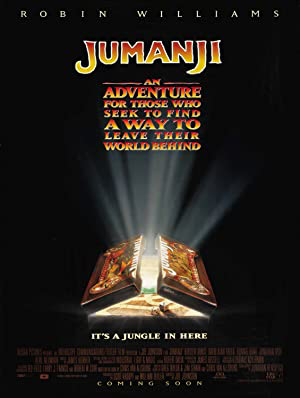

In [69]:
name="Shawshank Redemption, The (1994)"
name='Jumanji (1995)'
params=dict(
apikey="c30da1bc",
t=format_name(name)["title"],
y=format_name(name)["year"])
url="http://www.omdbapi.com"
response=requests.get(url, params=params).json()
poster_url=response['Poster']
Image.open(requests.get(poster_url, stream=True).raw)

In [61]:
name.replace(", The (1994)", "")

'Shawshank Redemption'

In [62]:
re.sub(r", The \(\d+\)", "", name)

'Shawshank Redemption'

In [ ]:
from Pa